In [1]:
# Before running, run following commands to install YOLOv8
# Note: the notebooks was run on the "Python 3.10 - SDK V2" env. in Azure ML.
# Note: you can install YOLOv8 directly via SDK: pip install ultralytics

# He Zhang, Feb, 2023

In [2]:
# install YOLOv8 / ultralytics
%pip install ultralytics==8.0.20

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 8.0.129, 8.0.174, 8.0.177, 8.1.21, 8.1.31, 8.2.7, 8.2.47
ERROR: Ignored the following versions that require a different python version: 8.0.10 Requires-Python >=3.7,<=3.11; 8.0.11 Requires-Python >=3.7,<=3.11; 8.0.12 Requires-Python >=3.7,<=3.11; 8.0.13 Requires-Python >=3.7,<=3.11; 8.0.14 Requires-Python >=3.7,<=3.11; 8.0.15 Requires-Python >=3.7,<=3.11; 8.0.16 Requires-Python >=3.7,<=3.11; 8.0.17 Requires-Python >=3.7,<=3.11; 8.0.18 Requires-Python >=3.7,<=3.11; 8.0.19 Requires-Python >=3.7,<=3.11; 8.0.20 Requires-Python >=3.7,<=3.11; 8.0.21 Requires-Python >=3.7,<=3.11; 8.0.22 Requires-Python >=3.7,<=3.11; 8.0.23 Requires-Python >=3.7,<=3.11; 8.0.24 Requires-Python >=3.7,<=3.11; 8.0.25 Requires-Python >=3.7,<=3.11; 8.0.26 Requires-Python >=3.7,<=3.11; 8.0.27 Requires-Python >=3.7,<=3.11; 8.0.28 Requires-Python >=3.7,<=3.11; 8.0.29 Requires-Python >=3.7,<=3.11; 8.0.30 Requires-Python >=3.7,<=3.11; 8.0.31 Requires-Python >=3.7,<=3.11; 8.0.

In [4]:
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 2.3.0+cpu
Torchvision: 0.18.0+cpu
NO GPU


In [5]:
# import ultralytics / YOLOv8, and do self-checks
import ultralytics
from ultralytics import YOLO

ultralytics.checks()

Ultralytics YOLOv8.2.21  Python-3.12.2 torch-2.3.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
Setup complete  (16 CPUs, 15.7 GB RAM, 60.6/227.0 GB disk)


In [6]:
# create a folder to host YOLOv8 artefacts
import os

folder_name = "yolov8"
os.makedirs(folder_name) if not os.path.exists(folder_name) else print("folder exists!")

In [9]:
# test a pre-trained YOLOv8 model - SDK
model = YOLO(f"{folder_name}/yolov8n.pt")
results = model.predict(source=r"D:\syook\Syook-Project\hard_hat_workers\test\images\img1.jpg", 
                        save=True, project="./yolov8/runs", conf=0.25)


image 1/1 D:\syook\Syook-Project\hard_hat_workers\test\images\img1.jpg: 448x640 8 persons, 156.1ms
Speed: 11.1ms preprocess, 156.1ms inference, 13.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to yolov8\runs\predict


Bboxes:
 tensor([[232.7016, 207.5513, 261.1732, 309.4505],
        [434.4684, 152.7001, 476.3133, 248.3970],
        [341.7727, 235.5379, 371.5289, 311.2925],
        [281.3698, 207.8460, 306.2310, 289.2325],
        [373.3147, 237.3460, 397.8134, 277.2592],
        [327.0911, 239.5470, 353.3650, 310.2804],
        [294.6958, 195.3975, 314.1257, 260.7639],
        [351.9062, 237.4971, 371.9517, 313.3441]])
Confidence Score:
 tensor([0.7553, 0.6353, 0.6034, 0.5934, 0.4920, 0.4461, 0.3874, 0.2513])
Class Indices:
 tensor([0., 0., 0., 0., 0., 0., 0., 0.])


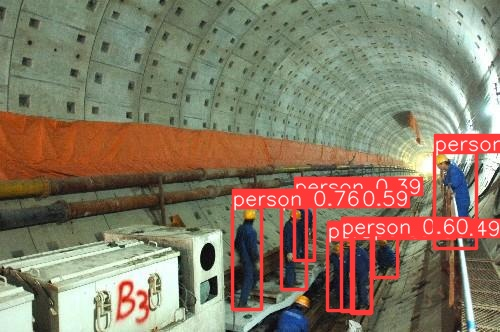

In [14]:
# check detection results
from IPython.display import display, Image

print("Bboxes:\n", results[0].boxes.xyxy)
print("Confidence Score:\n", results[0].boxes.conf)
print("Class Indices:\n", results[0].boxes.cls)
Image(filename=rf"{folder_name}\runs\predict\img1.jpg", width=500, height=400)